In [108]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
from scipy.spatial import distance_matrix as dist
from sklearn import tree
from sklearn import datasets,metrics
from scipy.stats import mode as mode
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


In [3]:
def KNN(train_x,test_y,train_labels,K):
    closer = np.argpartition(dist(test_y,train_x),K)
    targets = train_labels[closer]
    labels= targets[:,:K]
    targets = mode(labels, axis=1)[0]
    
    return targets.ravel()

def accuracy(predictions,targets):
    result=(list(predictions==targets))
    return result.count(True) / len(result) * 100



In [4]:
irisy=iris.data

In [5]:
targets = KNN(iris.data,iris.data,iris.target,3)

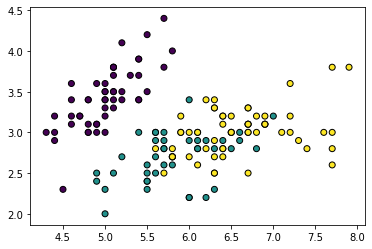

In [6]:
plt.scatter(irisy[:, 0], irisy[:, 1], c=targets, edgecolors='black')


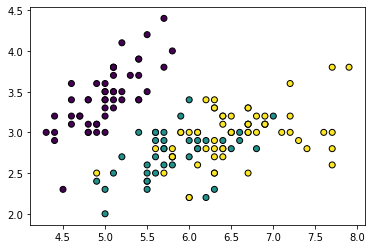

In [7]:
plt.scatter(irisy[:, 0], irisy[:, 1], c=iris['target'], edgecolors='black')


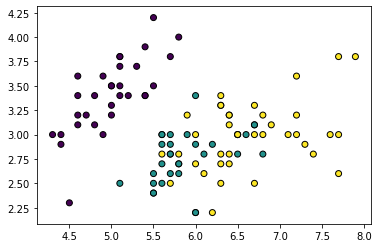

In [8]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
train, test = train_test_split(iris_df, test_size=0.6666)

X_train= np.array(train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
X_train_labels= np.array(train['target'])
Y_test = np.array(test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
Y_test_labels = np.array(test['target'])

predictions = KNN(X_train,Y_test,X_train_labels, 3)
plt.scatter(Y_test[:, 0], Y_test[:, 1], c=predictions, edgecolors='black')


# 1 B

In [30]:
#plt.scatter(test_iris_x[:, 0], test_iris_x[:, 1], c=test_iris_y, edgecolors='black')
X_iris_train = X_train
X_iris_train_labels = X_train_labels
Y_iris_test = Y_test
Y_iris_test_labels = Y_test_labels
for i in range(1,25,2):
    predictions = KNN(X_train,Y_test,X_train_labels, i)
    print(accuracy(predictions,Y_test_labels))

97.9966611018364
97.8297161936561
97.88536449638286
97.66277128547578
97.71841958820256
97.94101279910963
97.38452977184195
97.27323316638842
97.21758486366166
97.10628825820812
97.05063995548136
96.99499165275459


In [31]:

def crossvalidation(X,labels):
    indices = np.random.uniform(0, 10, len(X)).astype(int)
    sum=0
    for i in range(10):
        X_test = X[indices == i]
        X_labels = labels[indices == i]
        Y_train = X[indices != i]
        Y_labels = labels[indices != i]
        new_targets = KNN(Y_train,X_test,Y_labels,5)
        sum += accuracy(new_targets,X_labels)
    print(sum / 10)

# C

In [32]:
train_digits = np.array(pd.read_csv('optdigits.tra', header=None))
test_digits = np.array(pd.read_csv('optdigits.tes', header=None))

X_train = train_digits[:,:64]
X_train_labels = train_digits[:,-1]
Y_test = test_digits[:,:64]
Y_test_labels = test_digits[:,-1]
predictions = KNN(X_train,Y_test,X_train_labels,3)
print(accuracy(predictions,Y_test_labels))


97.8297161936561


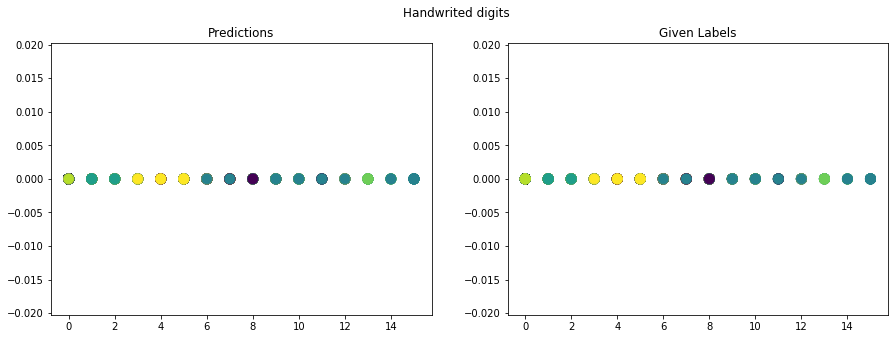

In [33]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,5)
fig.suptitle('Handwrited digits')

axes[0].set_title('Predictions')
axes[1].set_title('Given Labels')

axes[0].scatter(Y_test[:, 30], Y_test[:, 32], s=100,
                c=predictions, marker='o')

axes[1].scatter(Y_test[:, 30], Y_test[:, 32], s=100,
                c=Y_test_labels, marker='o')

In [34]:

crossvalidation(Y_test,Y_test_labels)

98.58958807042247


In [36]:
crossvalidation(Y_iris_test,Y_iris_test_labels)

98.66392300381868


# Task 3/Titanic

Random Trees Forest - Zawsze sampel o długości N, ale pobieramy losowo z powtorzeniami. Na kazda decyzje mamy tylko kilka features i wybieramy najlepszy.
Extra Trees - Zawsze mamy pełen sampel, bez pobierania z powtórzeniami. Losujemy thresholdy dla danych featurow i wybieramy najlepszy feature. ale i tak jest to bardziej 'randomowe' niz w RTF

In [37]:
titanic_data = pd.read_csv("titanic_train.csv")
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
data = titanic_data.dropna()

data.loc[:,'Sex'] = pd.Categorical(data['Sex']).codes
data.loc[:,'Embarked'] = pd.Categorical(data['Embarked']).codes
data.head()
data_targets = data['Survived']
data = data.drop(['Survived'],axis=1)
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,1
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
889,1,1,26.0,0,0,30.0000,0


In [88]:
random_trees_forest = RandomForestClassifier(n_estimators=30)
random_trees_forest = random_trees_forest.fit(data,data_targets)
random_trees_forest.score(data,data_targets)

1.0

In [40]:
def crossvalidation_for_trees(X,labels):
    random_trees_forest = RandomForestClassifier(n_estimators=20)
    extra_random_trees = ExtraTreesClassifier(n_estimators=20)
    
    indices = np.random.uniform(0, 10, len(X)).astype(int)
    sum=0
    for i in range(10):
        X_test = X[indices == i]
        X_labels = labels[indices == i]
        Y_train = X[indices != i]
        Y_labels = labels[indices != i]
        random_trees_forest = random_trees_forest.fit(Y_train,Y_labels)
        extra_random_trees = extra_random_trees.fit(Y_train,Y_labels)
        print(f'{i+1} attempt with RandomForestClassifier:')
        print(random_trees_forest.score(X_test,X_labels))
        print(f'{i+1} attempt with ExtraTreesClassifier:')
        print(extra_random_trees.score(X_test,X_labels))
        
        
crossvalidation_for_trees(data,data_targets)

1 attempt with RandomForestClassifier:
0.7948717948717948
1 attempt with ExtraTreesClassifier:
0.7564102564102564
2 attempt with RandomForestClassifier:
0.7945205479452054
2 attempt with ExtraTreesClassifier:
0.7671232876712328
3 attempt with RandomForestClassifier:
0.7619047619047619
3 attempt with ExtraTreesClassifier:
0.7619047619047619
4 attempt with RandomForestClassifier:
0.7714285714285715
4 attempt with ExtraTreesClassifier:
0.7428571428571429
5 attempt with RandomForestClassifier:
0.7714285714285715
5 attempt with ExtraTreesClassifier:
0.7571428571428571
6 attempt with RandomForestClassifier:
0.8529411764705882
6 attempt with ExtraTreesClassifier:
0.8382352941176471
7 attempt with RandomForestClassifier:
0.797752808988764
7 attempt with ExtraTreesClassifier:
0.7640449438202247
8 attempt with RandomForestClassifier:
0.8
8 attempt with ExtraTreesClassifier:
0.8166666666666667
9 attempt with RandomForestClassifier:
0.7777777777777778
9 attempt with ExtraTreesClassifier:
0.7530864

# Task 3/IRIS

In [41]:
iris = datasets.load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_targets = iris['target']

crossvalidation_for_trees(data,data_targets)

1 attempt with RandomForestClassifier:
0.9166666666666666
1 attempt with ExtraTreesClassifier:
1.0
2 attempt with RandomForestClassifier:
0.9565217391304348
2 attempt with ExtraTreesClassifier:
0.9565217391304348
3 attempt with RandomForestClassifier:
0.8
3 attempt with ExtraTreesClassifier:
0.8
4 attempt with RandomForestClassifier:
0.9411764705882353
4 attempt with ExtraTreesClassifier:
0.9411764705882353
5 attempt with RandomForestClassifier:
1.0
5 attempt with ExtraTreesClassifier:
1.0
6 attempt with RandomForestClassifier:
1.0
6 attempt with ExtraTreesClassifier:
1.0
7 attempt with RandomForestClassifier:
1.0
7 attempt with ExtraTreesClassifier:
1.0
8 attempt with RandomForestClassifier:
1.0
8 attempt with ExtraTreesClassifier:
1.0
9 attempt with RandomForestClassifier:
1.0
9 attempt with ExtraTreesClassifier:
1.0
10 attempt with RandomForestClassifier:
1.0
10 attempt with ExtraTreesClassifier:
1.0


# Task 4/Mushroom

Only mushroom_data['stalk-root'] is missing values, but by using .codes we just replace them with 0's.
No need for standarization/normalization.

In [42]:
columns = ["target","cap-shape", "cap-surface", "cap-color", "bruises?", "odor", 
 "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", 
 "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
 "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", 
 "ring-number", "ring-type", "spore-print-color", "population", "habitat", ]

mushroom_data = pd.read_csv("agaricus-lepiota.data",names=columns)
print(mushroom_data['stalk-root'])
mushroom_data.head()
mushroom_targets = mushroom_data['target']
mushroom_data = mushroom_data.drop(['target'],axis=1)
mushroom_data=mushroom_data.dropna()
new_columns = columns[1:]
for string in new_columns:
    mushroom_data.loc[:,string] = pd.Categorical(mushroom_data[string]).codes
mushroom_data['stalk-root']


0       e
1       c
2       c
3       e
4       e
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 8124, dtype: object


0       3
1       2
2       2
3       3
4       3
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: stalk-root, Length: 8124, dtype: int8

In [43]:
crossvalidation_for_trees(mushroom_data,mushroom_targets)

1 attempt with RandomForestClassifier:
1.0
1 attempt with ExtraTreesClassifier:
1.0
2 attempt with RandomForestClassifier:
1.0
2 attempt with ExtraTreesClassifier:
1.0
3 attempt with RandomForestClassifier:
1.0
3 attempt with ExtraTreesClassifier:
1.0
4 attempt with RandomForestClassifier:
1.0
4 attempt with ExtraTreesClassifier:
1.0
5 attempt with RandomForestClassifier:
1.0
5 attempt with ExtraTreesClassifier:
1.0
6 attempt with RandomForestClassifier:
1.0
6 attempt with ExtraTreesClassifier:
1.0
7 attempt with RandomForestClassifier:
1.0
7 attempt with ExtraTreesClassifier:
1.0
8 attempt with RandomForestClassifier:
1.0
8 attempt with ExtraTreesClassifier:
1.0
9 attempt with RandomForestClassifier:
1.0
9 attempt with ExtraTreesClassifier:
1.0
10 attempt with RandomForestClassifier:
1.0
10 attempt with ExtraTreesClassifier:
1.0


In [44]:
random_trees_forest = RandomForestClassifier(n_estimators=10)
extra_random_trees = ExtraTreesClassifier(n_estimators=10)
random_trees_forest.fit(mushroom_data,mushroom_targets)
extra_random_trees.fit(mushroom_data,mushroom_targets)
extra_random_trees.score(mushroom_data,mushroom_targets)
tt = extra_random_trees.fit(mushroom_data,mushroom_targets)
t = tree.DecisionTreeClassifier()
t = t.fit(mushroom_data, mushroom_targets)

with open("mushrooms", "w") as f:
    tree.export_graphviz(t, out_file=f,feature_names=mushroom_data.columns)




# Drawing a decision tree for mushrooms data

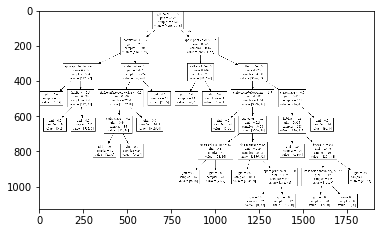

In [51]:
imag = img.imread('mushroom_tree.png')
imgplot = plt.imshow(imag)

# Task 5

In [78]:
def encode_data(data,columns):
    for string in columns:
        data.loc[:,string] = pd.Categorical(data[string]).codes
    return data

encoding data, no need for normalization/standarization, no missing values

In [85]:
names = ['buying','maint','doors','persons','lug_boot','safety','class']
cars_data = pd.read_csv('car.data',names=names)

cars_data = encode_data(cars_data,names)


cars_targets = cars_data['class']
cars_data = cars_data.drop(['class'],axis=1)
crossvalidation_for_trees(cars_data,cars_targets)

1 attempt with RandomForestClassifier:
0.9629629629629629
1 attempt with ExtraTreesClassifier:
0.9629629629629629
2 attempt with RandomForestClassifier:
0.9782608695652174
2 attempt with ExtraTreesClassifier:
0.9565217391304348
3 attempt with RandomForestClassifier:
0.9587628865979382
3 attempt with ExtraTreesClassifier:
0.9742268041237113
4 attempt with RandomForestClassifier:
0.9945652173913043
4 attempt with ExtraTreesClassifier:
0.9891304347826086
5 attempt with RandomForestClassifier:
0.9803921568627451
5 attempt with ExtraTreesClassifier:
0.9803921568627451
6 attempt with RandomForestClassifier:
0.9493670886075949
6 attempt with ExtraTreesClassifier:
0.9936708860759493
7 attempt with RandomForestClassifier:
0.954248366013072
7 attempt with ExtraTreesClassifier:
0.9607843137254902
8 attempt with RandomForestClassifier:
0.9841269841269841
8 attempt with ExtraTreesClassifier:
0.9682539682539683
9 attempt with RandomForestClassifier:
0.9668508287292817
9 attempt with ExtraTreesClassi

# Drawing a decision tree from Cars_data

(2164, 5573, 4)


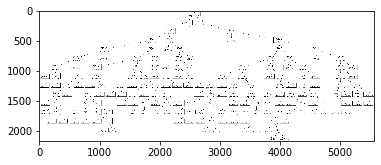

In [111]:
t = tree.DecisionTreeClassifier()
t = t.fit(cars_data, cars_targets)

with open("cars", "w") as f:
    tree.export_graphviz(t, out_file=f,feature_names=cars_data.columns)

imag = img.imread('cars.png')
print(imag.shape)

imgplot = plt.imshow(imag)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')